# Aprendizaje Supervisado

## Preparación de la Información

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

california = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSets/california_total_bedrooms.csv")

In [ ]:
california.head()

,total_bedrooms
0,661
1,310
2,507
3,15
4,244


In [ ]:
california.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   total_bedrooms  3000 non-null   int64
dtypes: int64(1)
memory usage: 23.6 KB


Histograma

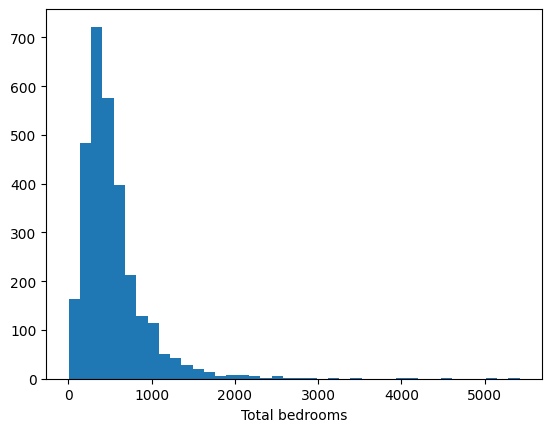

In [ ]:
plt.hist(california["total_bedrooms"], bins=40)
plt.xlabel("Total bedrooms")
plt.show()

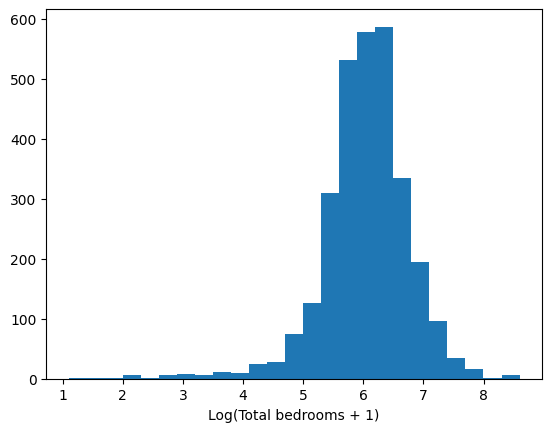

In [ ]:
def funlog(X):
  return np.log(X+1)

plt.hist(funlog(california["total_bedrooms"]), bins=25)
plt.xlabel("Log(Total bedrooms + 1)")
plt.show()

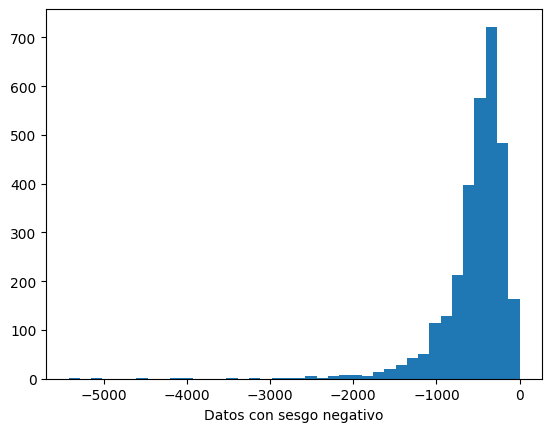

In [ ]:
X2 = (-1) * california["total_bedrooms"]

plt.hist(X2, bins=40)
plt.xlabel("Datos con sesgo negativo")
plt.show()

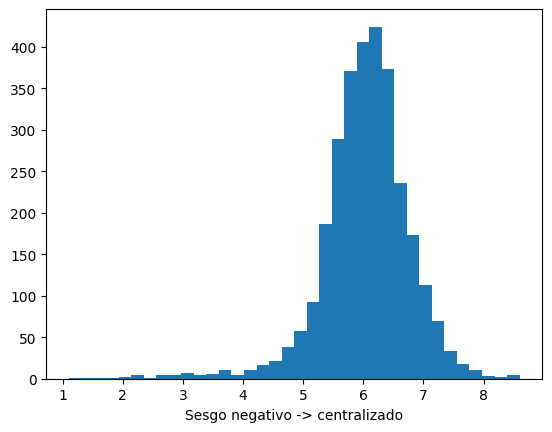

In [ ]:
x2nuevo = np.log(1-X2)

plt.hist(x2nuevo, bins=36)
plt.xlabel("Sesgo negativo -> centralizado")
plt.show()

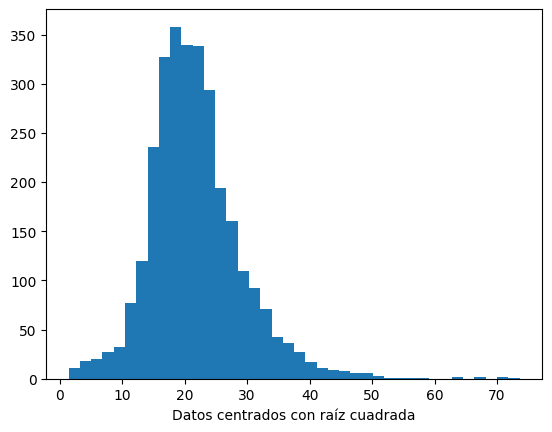

In [ ]:
plt.hist(np.sqrt(california["total_bedrooms"]), bins = 40)
plt.xlabel("Datos centrados con raíz cuadrada")
plt.show()

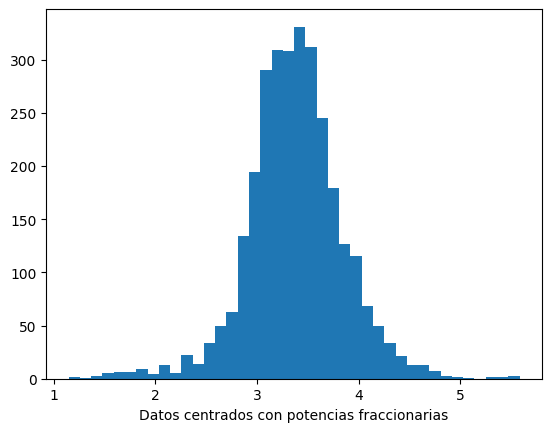

In [ ]:
plt.hist(np.power(california["total_bedrooms"], 0.2), bins = 40)
plt.xlabel("Datos centrados con potencias fraccionarias")
plt.show()

Estandarización

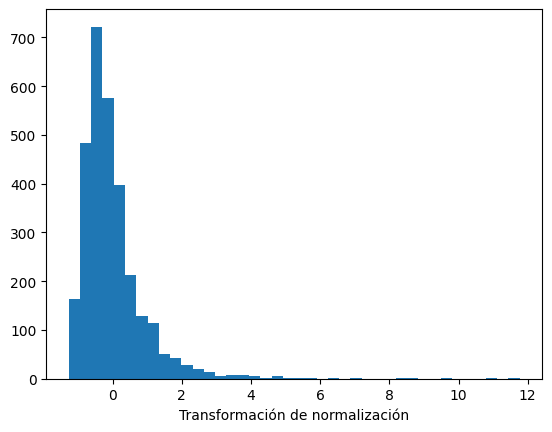

In [ ]:
def fun2(X):
  return (X - np.mean(X)) / np.std(X)

plt.hist(fun2(california['total_bedrooms']), bins = 40)
plt.xlabel("Transformación de normalización")
plt.show()

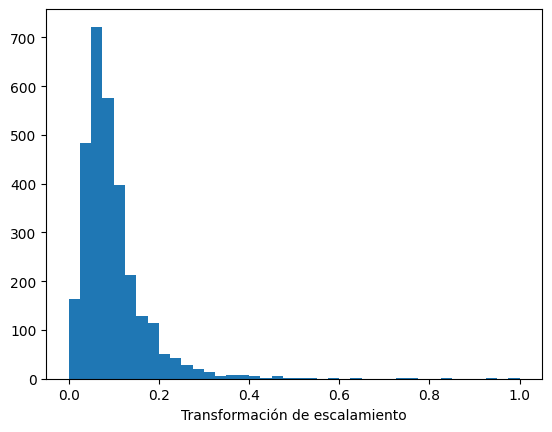

In [ ]:
def fun3(X):
  return (X - np.min(X)) / (np.max(X) - np.min(X))

plt.hist(fun3(california['total_bedrooms']), bins = 40)
plt.xlabel("Transformación de escalamiento")
plt.show()

## Modelos de Aprendizaje Supervisado

### Identificación del Tipo de Aprendizaje

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

titanic = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSets/titanic.csv")
edad = titanic["age"]

edad.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: age, dtype: float64

In [ ]:
dfedad = pd.DataFrame(edad.dropna(axis=0, inplace=False))
dfedad.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     714 non-null    float64
dtypes: float64(1)
memory usage: 11.2 KB


In [ ]:
print(max(edad),"\n",min(edad))

80.0 
 0.42


In [ ]:
th = [0,18,30,90]

dfedad["age-d"] = pd.cut(dfedad["age"], bins=th, right=False)

dfedad.head(9)

,age,age-d
0,22.0,"[18, 30)"
1,38.0,"[30, 90)"
2,26.0,"[18, 30)"
3,35.0,"[30, 90)"
4,35.0,"[30, 90)"
6,54.0,"[30, 90)"
7,2.0,"[0, 18)"
8,27.0,"[18, 30)"
9,14.0,"[0, 18)"


In [ ]:
dfedad.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   age     714 non-null    float64 
 1   age-d   714 non-null    category
dtypes: category(1), float64(1)
memory usage: 12.0 KB


In [ ]:
100 * (dfedad["age-d"].value_counts()) / dfedad.shape[0]

age-d
[30, 90)    46.218487
[18, 30)    37.955182
[0, 18)     15.826331
Name: count, dtype: float64

### Modelos de Aprendizaje Supervisado

In [ ]:
import pandas as pd
import numpy as np

german = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSets/german_credit_SC63.csv.data", sep=" ", header=None)

german

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


## Uso de los Modelos de Aprendizaje Supervisado

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np

titanic = sns.load_dataset("titanic")

titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
X = titanic[["pclass", "sex", "fare", "who", "adult_male", "alone"]]
Y = titanic[["survived"]]

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      891 non-null    int64  
 1   sex         891 non-null    object 
 2   fare        891 non-null    float64
 3   who         891 non-null    object 
 4   adult_male  891 non-null    bool   
 5   alone       891 non-null    bool   
dtypes: bool(2), float64(1), int64(1), object(2)
memory usage: 29.7+ KB


In [ ]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   survived  891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [ ]:
X.head()

,pclass,sex,fare,who,adult_male,alone
0,3,male,7.2500,man,True,False
1,1,female,71.2833,woman,False,False
2,3,female,7.9250,woman,False,True
3,1,female,53.1000,woman,False,False
4,3,male,8.0500,man,True,True


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cols = ["sex", "who", "adult_male", "alone"]

X[cols] = X[cols].apply(le.fit_transform)

X.head()

<ipython-input-9-32c9fb818491>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[cols] = X[cols].apply(le.fit_transform)


,pclass,sex,fare,who,adult_male,alone
0,3,1,7.2500,1,1,0
1,1,0,71.2833,2,0,0
2,3,0,7.9250,2,0,1
3,1,0,53.1000,2,0,0
4,3,1,8.0500,1,1,1


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y, train_size=0.6, random_state=11)

print("X_train_set\t\t", x_train.shape)
print("X_test_set\t\t", x_test.shape,"\n")

print("Y_train\t\t", y_train.shape)
print("Y_test\t\t", y_test.shape)

X_train_set		 (534, 6)
X_test_set		 (357, 6) 

Y_train		 (534, 1)
Y_test		 (357, 1)


In [ ]:
x_train.iloc[0:7]

,pclass,sex,fare,who,adult_male,alone
115,3,1,7.9250,1,1,1
170,1,1,33.5000,1,1,1
310,1,0,83.1583,2,0,1
666,2,1,13.0000,1,1,1
198,3,0,7.7500,2,0,1
717,2,0,10.5000,2,0,1
695,2,1,13.5000,1,1,1


In [ ]:
from sklearn.linear_model import LogisticRegression

modelo_RL_base = LogisticRegression(random_state=5)

print(modelo_RL_base)

LogisticRegression(random_state=5)


In [ ]:
modelo_RL_base.fit(x_train, np.ravel(y_train))

LogisticRegression(random_state=5)

## Matriz de Confusión e Interpretación de Resultados

In [1]:
from sklearn.datasets import load_breast_cancer

X,y = load_breast_cancer(return_X_y=True)

print(X.shape, y.shape)

(569, 30) (569,)


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=11)

model = MLPClassifier(hidden_layer_sizes=(10),
                      max_iter=1000,
                      alpha=1,
                      random_state=42)

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.9298245614035088

In [4]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test, labels=[0,1])

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/usr/local/lib/python3.10/dist-packages/sklearn/metrics/__init__.py)